In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Assignment_Data - ML_Intern_Assignment_Data.csv.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [7]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


In [8]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64

In [9]:
#NO NULL VALUES PRESENT IN DATA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [11]:
## NO CATEGORICAL DATA BUT WILL IMPUTE OBJECT==INT

In [12]:
#DROPPING CUSTOMER ID AS OF NO THAT IMPORTANCE AND HIGH CARDINZLITY

In [13]:
df = df.drop(columns=['CustomerID'],axis=1)

In [14]:
df

,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,Female,33,69,88.51,4833.99,Cash,No,62,1,54
...,...,...,...,...,...,...,...,...,...,...
195,Male,32,61,113.54,9607.02,Credit Card,Yes,80,39,147
196,Male,47,67,133.12,4380.96,PayPal,No,21,46,62
197,Female,61,9,96.09,1599.30,Credit Card,No,56,23,154
198,Male,24,45,142.44,3527.95,PayPal,Yes,69,15,118


# EDA:

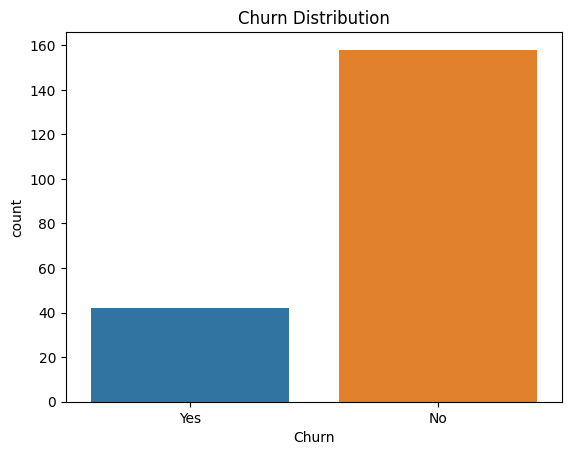

In [15]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

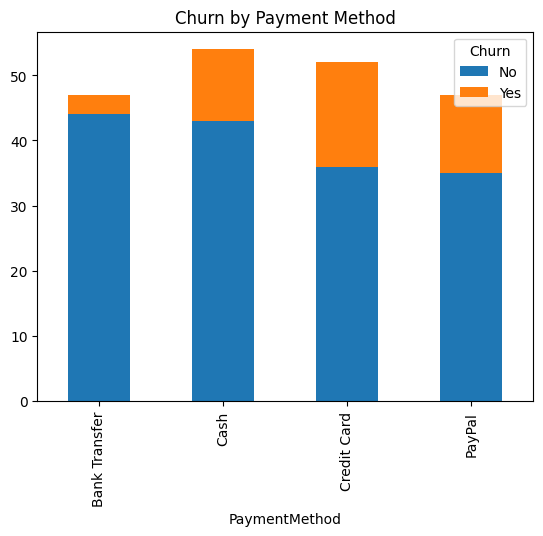

In [16]:
# Churn by Payment Method
df.groupby(['PaymentMethod', 'Churn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by Payment Method')
plt.show()

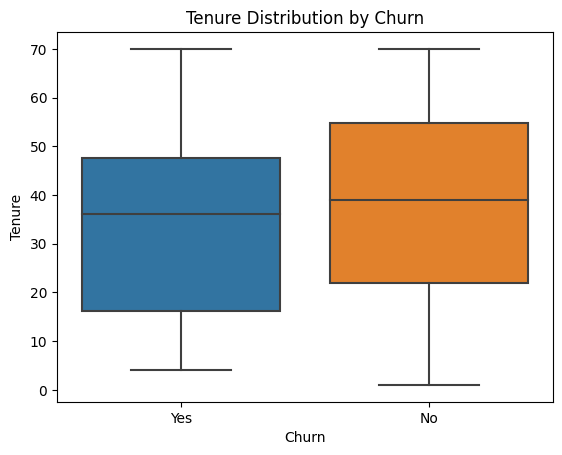

In [17]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure Distribution by Churn')  
plt.show()

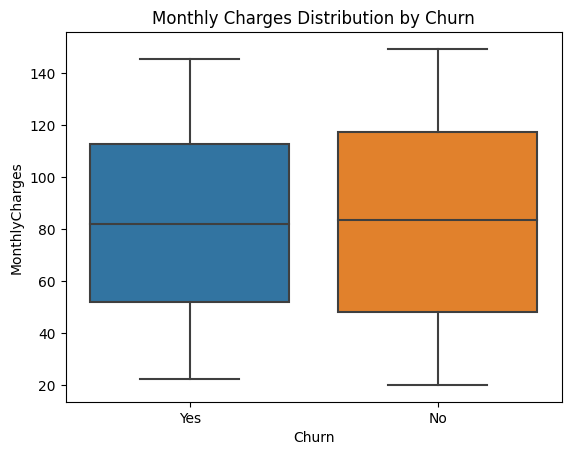

In [18]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

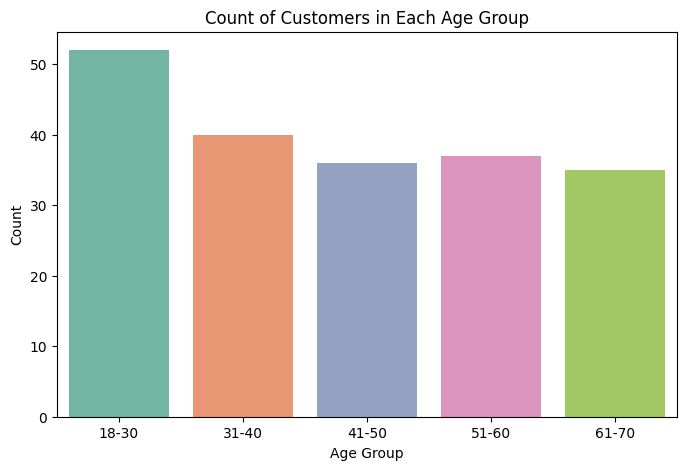

In [19]:
# Bar Plot for Age Groups
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the count of each age group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', palette='Set2')
plt.title('Count of Customers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

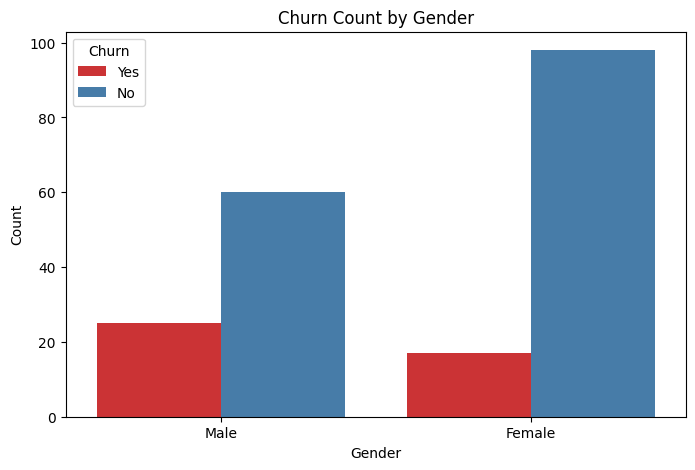

In [20]:
# Bar Plot for Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Churn', palette='Set1')
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

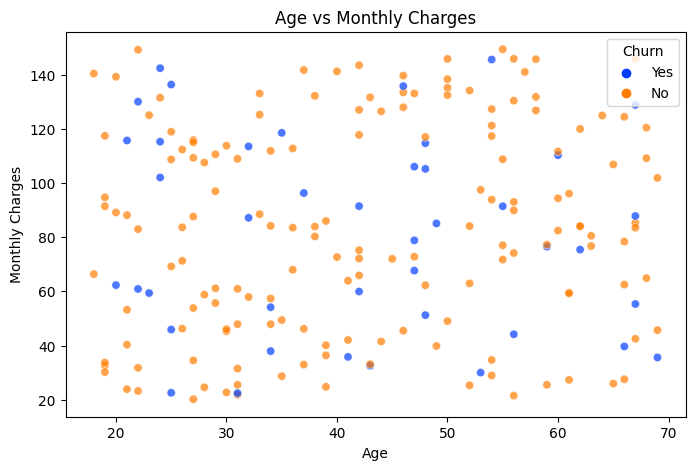

In [21]:
#Scatter Plot for Age vs MonthlyCharges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='MonthlyCharges', hue='Churn', palette="bright", alpha=0.7)
plt.title('Age vs Monthly Charges')
plt.xlabel('Age')
plt.ylabel('Monthly Charges')
plt.show()

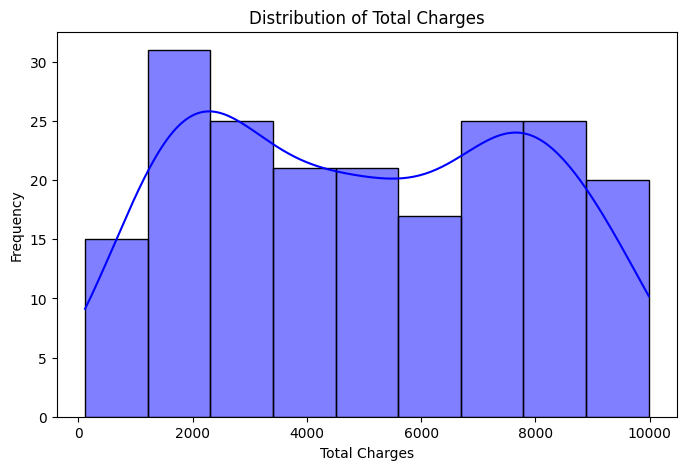

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalCharges'], kde=True, color='blue')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

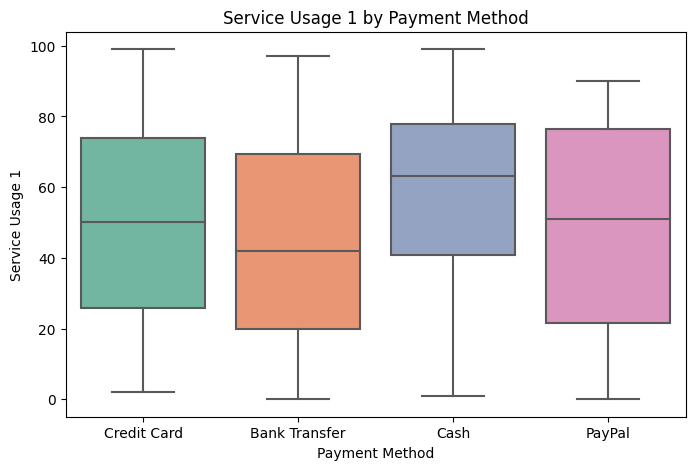

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='PaymentMethod', y='ServiceUsage1', palette='Set2')
plt.title('Service Usage 1 by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Service Usage 1')
plt.show()

d:\Users\ROHIT\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


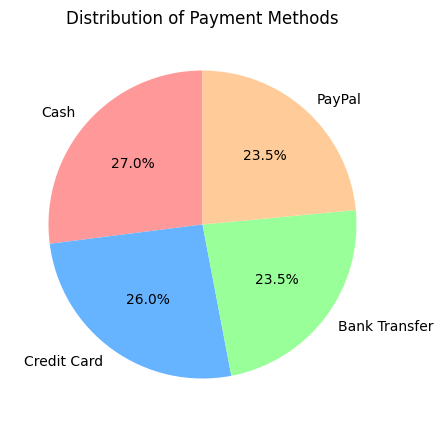

In [24]:
payment_method_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(8, 5))
payment_method_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Hide the y-label
plt.show()


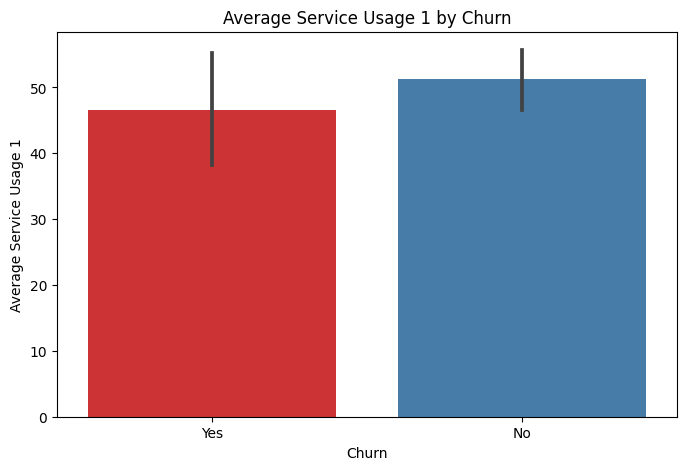

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Churn', y='ServiceUsage1', palette='Set1')
plt.title('Average Service Usage 1 by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Service Usage 1')
plt.show()

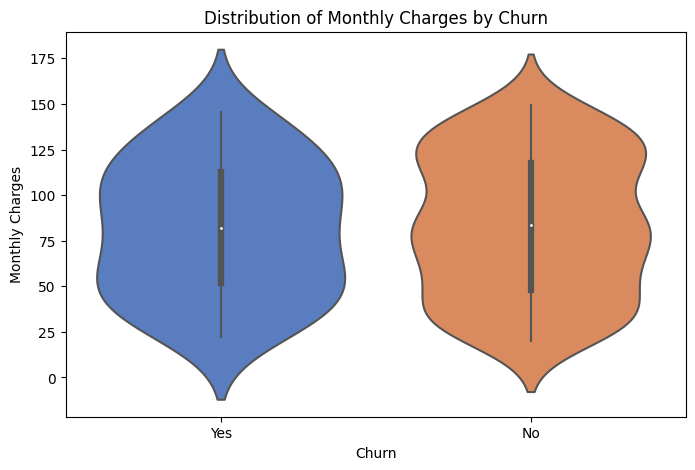

In [26]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette='muted')
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


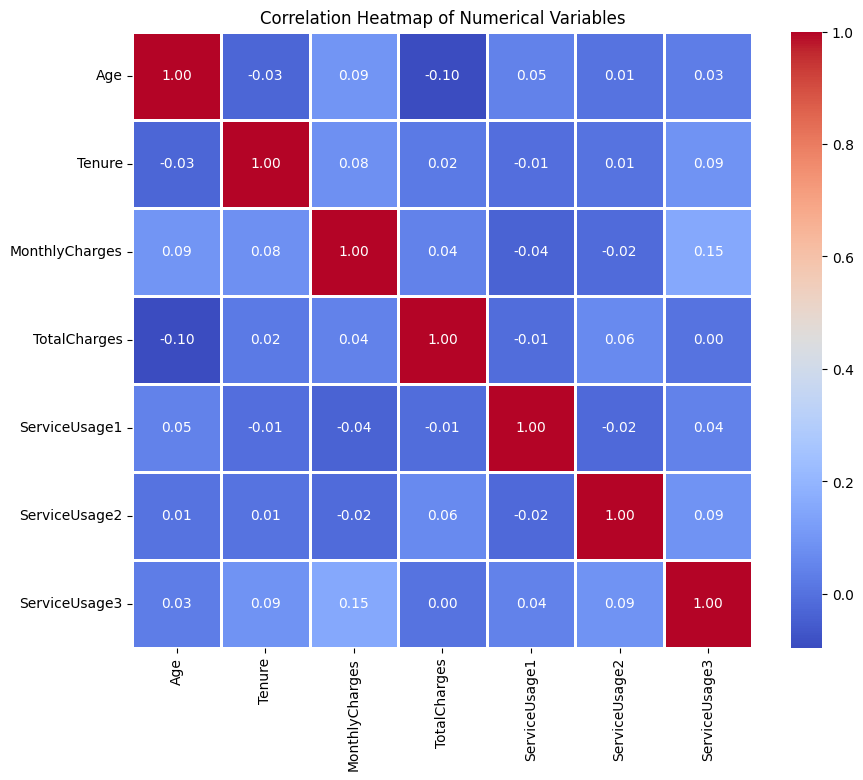

In [27]:
corr = df[['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [28]:
numeric_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges','ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']
correlation_matrix = df[numeric_cols + ['Churn']].copy()
correlation_matrix['Churn'] = (correlation_matrix['Churn'] == 'Yes').astype(int)

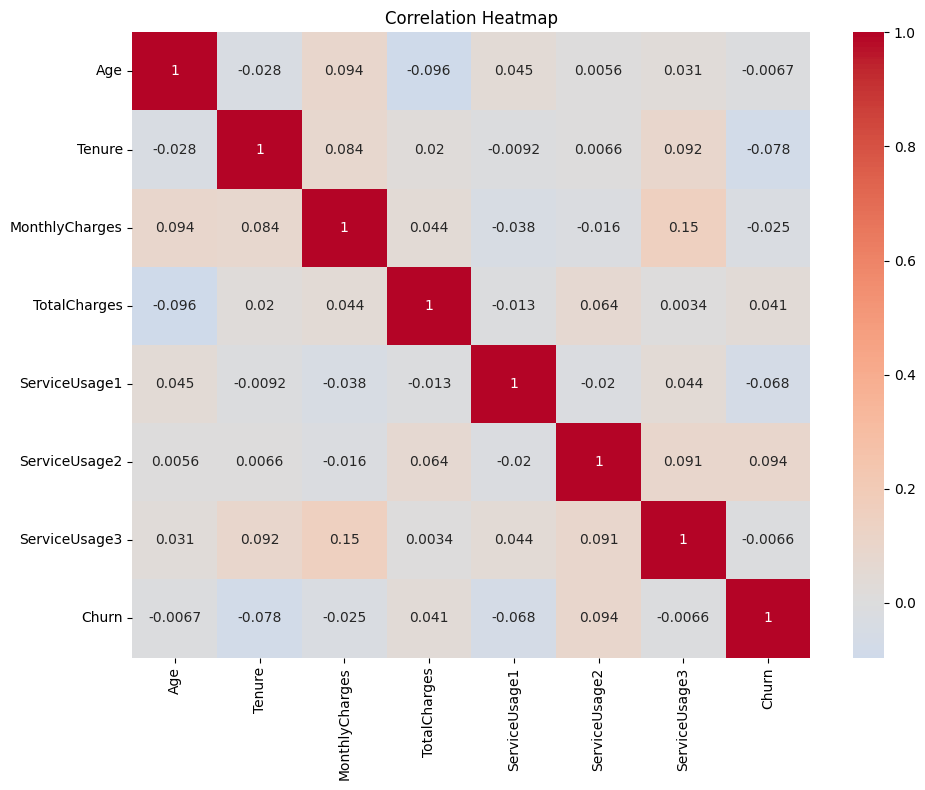

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [30]:
#CREATING NEW FEATURES

In [31]:
# Calculate average spend per month
df['AvgSpendPerMonth'] = df['TotalCharges'] / df['Tenure']
# Calculate total service usage
df['TotalServiceUsage'] = df['ServiceUsage1'] + df['ServiceUsage2'] + df['ServiceUsage3']

In [32]:
df['AvgSpendPerMonth']

0      590.082000
1      324.371739
2       78.582821
3       55.579149
4       70.057826
          ...    
195    157.492131
196     65.387463
197    177.700000
198     78.398889
199     59.064412
Name: AvgSpendPerMonth, Length: 200, dtype: float64

In [33]:
df['TotalServiceUsage']

0      142
1      219
2      230
3      273
4      117
      ... 
195    266
196    129
197    233
198    202
199    211
Name: TotalServiceUsage, Length: 200, dtype: int64

In [34]:
df.head()

,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,AgeGroup,AvgSpendPerMonth,TotalServiceUsage
0,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63,18-30,590.082000,142
1,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136,18-30,324.371739,219
2,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165,18-30,78.582821,230
3,Male,56,47,145.90,2612.22,Cash,No,64,40,169,51-60,55.579149,273
4,Female,33,69,88.51,4833.99,Cash,No,62,1,54,31-40,70.057826,117


In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])  # Male: 0, Female: 1
df['Churn_encoded'] = label_encoder.fit_transform(df['Churn'])  # No: 0, Yes: 1


In [36]:
df_encoded = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)
df_encoded.drop(['Gender', 'Churn'], axis=1, inplace=True)

In [37]:
df_encoded.head()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3,AgeGroup,AvgSpendPerMonth,TotalServiceUsage,Gender_encoded,Churn_encoded,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,20,5,62.31,2950.41,59,20,63,18-30,590.082000,142,1,1,0,1,0
1,25,23,118.96,7460.55,42,41,136,18-30,324.371739,219,0,0,0,0,0
2,25,39,69.20,3064.73,65,0,165,18-30,78.582821,230,0,0,0,0,0
3,56,47,145.90,2612.22,64,40,169,51-60,55.579149,273,1,0,1,0,0
4,33,69,88.51,4833.99,62,1,54,31-40,70.057826,117,0,0,1,0,0


In [38]:
#Scaling

In [39]:
scaler = StandardScaler()

# List of numeric columns to scale
numeric_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1', 'ServiceUsage2', 
                   'ServiceUsage3', 'AvgSpendPerMonth', 'TotalServiceUsage']

# Apply scaling to the numeric columns
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [40]:
df_encoded.head()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3,AgeGroup,AvgSpendPerMonth,TotalServiceUsage,Gender_encoded,Churn_encoded,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,20,-1.527311,-0.546301,-0.747861,0.303786,-0.325171,-0.761761,18-30,0.341914,-0.587237,1,1,0,1,0
1,25,-0.638909,0.951290,0.865549,-0.289819,1.129268,0.499204,18-30,-0.043818,0.540516,0,0,0,0,0
2,25,0.150782,-0.364158,-0.706965,0.513293,-1.710351,1.000136,18-30,-0.400629,0.701624,0,0,0,0,0
3,56,0.545627,1.663473,-0.868841,0.478375,1.060009,1.069230,51-60,-0.434024,1.331408,1,0,1,0,0
4,33,1.631452,0.146319,-0.074049,0.408539,-1.641092,-0.917223,31-40,-0.413005,-0.953391,0,0,1,0,0


In [41]:
df_encoded.drop("AgeGroup", axis=1, inplace=True)

In [42]:
df_encoded

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3,AvgSpendPerMonth,TotalServiceUsage,Gender_encoded,Churn_encoded,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,20,-1.527311,-0.546301,-0.747861,0.303786,-0.325171,-0.761761,0.341914,-0.587237,1,1,0,1,0
1,25,-0.638909,0.951290,0.865549,-0.289819,1.129268,0.499204,-0.043818,0.540516,0,0,0,0,0
2,25,0.150782,-0.364158,-0.706965,0.513293,-1.710351,1.000136,-0.400629,0.701624,0,0,0,0,0
3,56,0.545627,1.663473,-0.868841,0.478375,1.060009,1.069230,-0.434024,1.331408,1,0,1,0,0
4,33,1.631452,0.146319,-0.074049,0.408539,-1.641092,-0.917223,-0.413005,-0.953391,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,32,1.236606,0.808008,1.633404,1.037061,0.990750,0.689213,-0.286077,1.228885,1,1,0,1,0
196,47,1.532740,1.325622,-0.236111,-1.023094,1.475563,-0.779035,-0.419785,-0.777637,1,0,0,0,1
197,61,-1.329889,0.346702,-1.231193,0.199032,-0.117394,0.810127,-0.256741,0.745562,0,0,0,1,0
198,24,0.446916,1.572004,-0.541258,0.652965,-0.671466,0.188281,-0.400896,0.291532,1,1,0,0,1


# MODEL BUILDING:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df_encoded.drop('Churn_encoded', axis=1)  # Dropping the target column 'Churn_encoded'
y = df_encoded['Churn_encoded']

In [45]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (200, 13)
y Shape:  (200,)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (160, 13)
X_test:  (40, 13)
y_train:  (160,)
y_test:  (40,)


# logistic Regression

LOGISTIC REGRESSION PERFORMANCE
Accuracy: 75.00%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.00      0.00      0.00         9

    accuracy                           0.75        40
   macro avg       0.38      0.48      0.43        40
weighted avg       0.60      0.75      0.66        40

--------------------------------------------------
Confusion Matrix:
[[30  1]
 [ 9  0]]


d:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


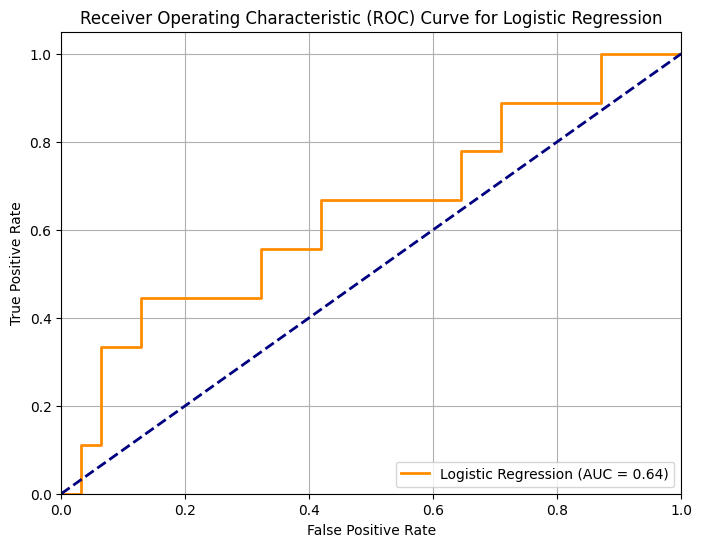

AUC for Logistic Regression: 0.64


In [47]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and Train Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Performance Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("="*50)
print("LOGISTIC REGRESSION PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_lr)
print("-"*50)
print("Confusion Matrix:")
print(cm_lr)
print("="*50)

# ROC Curve and AUC
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Logistic Regression: {roc_auc_lr:.2f}")


# DECISION TREE

DECISION TREE PERFORMANCE
Accuracy: 60.00%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.23      0.33      0.27         9

    accuracy                           0.60        40
   macro avg       0.50      0.51      0.50        40
weighted avg       0.65      0.60      0.62        40

--------------------------------------------------
Confusion Matrix:
[[21 10]
 [ 6  3]]


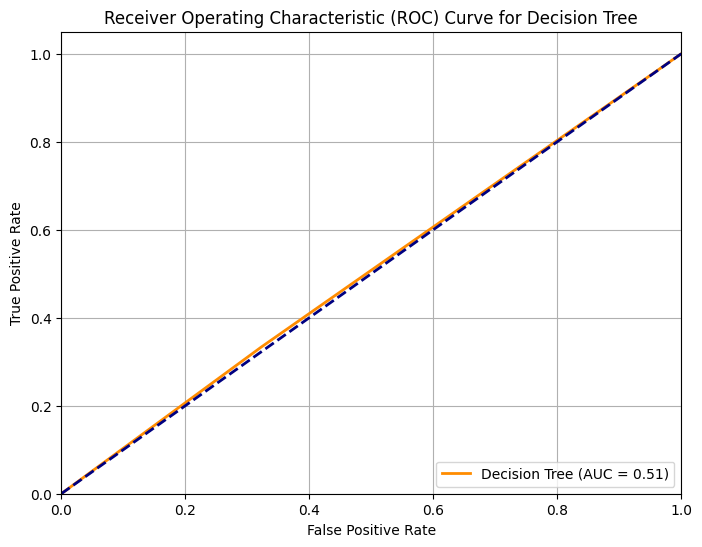

AUC for Decision Tree: 0.51


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("="*50)
print("DECISION TREE PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_dt)
print("-"*50)
print("Confusion Matrix:")
print(cm_dt)
print("="*50)

# ROC Curve and AUC
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Decision Tree: {roc_auc_dt:.2f}")


In [49]:
# RANDOM FOREST

RANDOM FOREST PERFORMANCE
Accuracy: 75.00%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.00      0.00      0.00         9

    accuracy                           0.75        40
   macro avg       0.38      0.48      0.43        40
weighted avg       0.60      0.75      0.66        40

--------------------------------------------------
Confusion Matrix:
[[30  1]
 [ 9  0]]


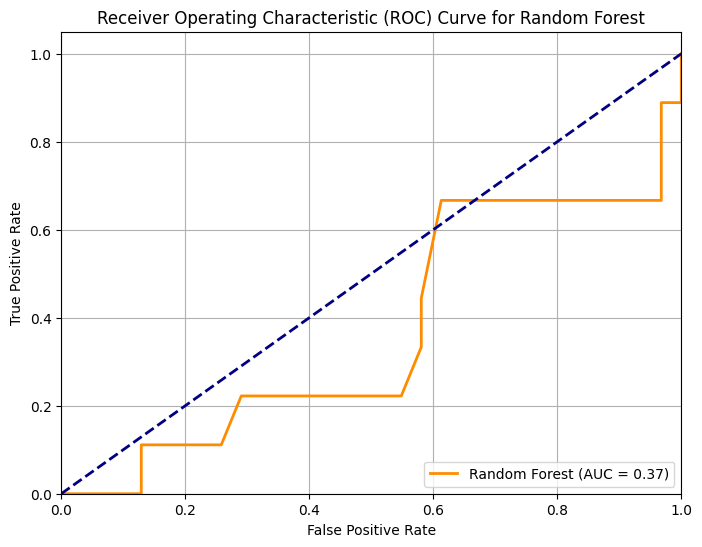

AUC for Random Forest: 0.37


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("="*50)
print("RANDOM FOREST PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_rf)
print("-"*50)
print("Confusion Matrix:")
print(cm_rf)
print("="*50)

y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Random Forest: {roc_auc_rf:.2f}")


# SVM

SUPPORT VECTOR MACHINE PERFORMANCE
Accuracy: 77.50%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        31
           1       0.00      0.00      0.00         9

    accuracy                           0.78        40
   macro avg       0.39      0.50      0.44        40
weighted avg       0.60      0.78      0.68        40

--------------------------------------------------
Confusion Matrix:
[[31  0]
 [ 9  0]]


d:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


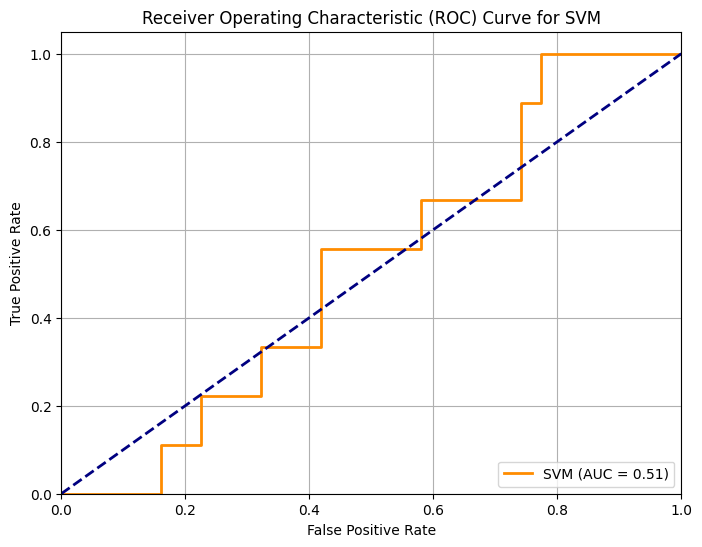

AUC for SVM: 0.51


In [51]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("="*50)
print("SUPPORT VECTOR MACHINE PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_svm)
print("-"*50)
print("Confusion Matrix:")
print(cm_svm)
print("="*50)

y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for SVM: {roc_auc_svm:.2f}")


# KNN

K-NEAREST NEIGHBORS PERFORMANCE
Accuracy: 75.00%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.33      0.11      0.17         9

    accuracy                           0.75        40
   macro avg       0.56      0.52      0.51        40
weighted avg       0.68      0.75      0.70        40

--------------------------------------------------
Confusion Matrix:
[[29  2]
 [ 8  1]]


d:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


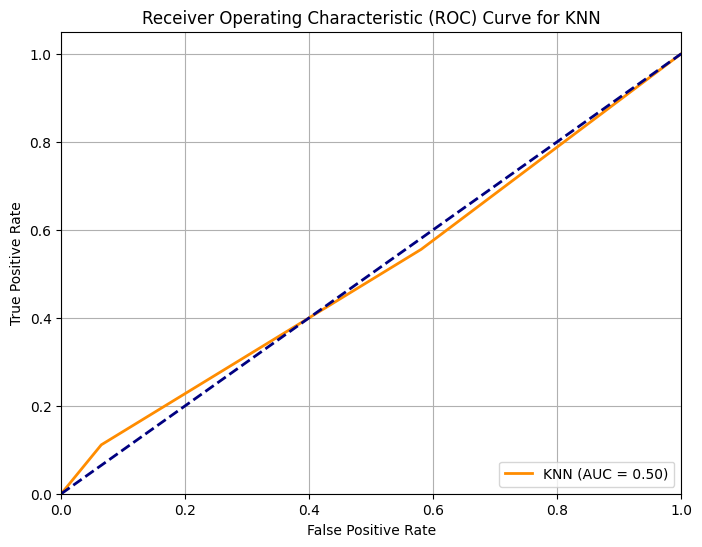

AUC for KNN: 0.50


In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and Train Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("="*50)
print("K-NEAREST NEIGHBORS PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_knn)
print("-"*50)
print("Confusion Matrix:")
print(cm_knn)
print("="*50)

y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for KNN: {roc_auc_knn:.2f}")


# NAIVE BAYES

NAIVE BAYES PERFORMANCE
Accuracy: 75.00%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        31
           1       0.40      0.22      0.29         9

    accuracy                           0.75        40
   macro avg       0.60      0.56      0.57        40
weighted avg       0.71      0.75      0.72        40

--------------------------------------------------
Confusion Matrix:
[[28  3]
 [ 7  2]]


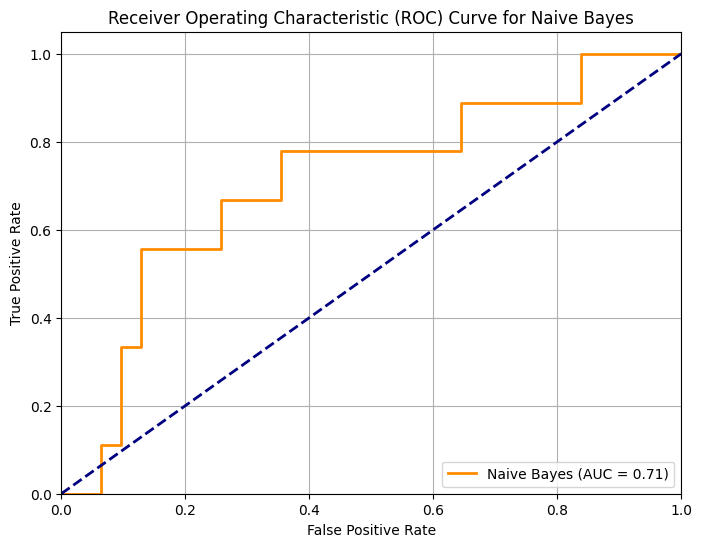

AUC for Naive Bayes: 0.71


In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("="*50)
print("NAIVE BAYES PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print("-"*50)
print("Classification Report:")
print(report_nb)
print("-"*50)
print("Confusion Matrix:")
print(cm_nb)
print("="*50)

y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Naive Bayes: {roc_auc_nb:.2f}")


In [54]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb]

In [55]:
model_results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

In [56]:
# Sorting the models
model_results = model_results.sort_values(by='Accuracy', ascending=False)

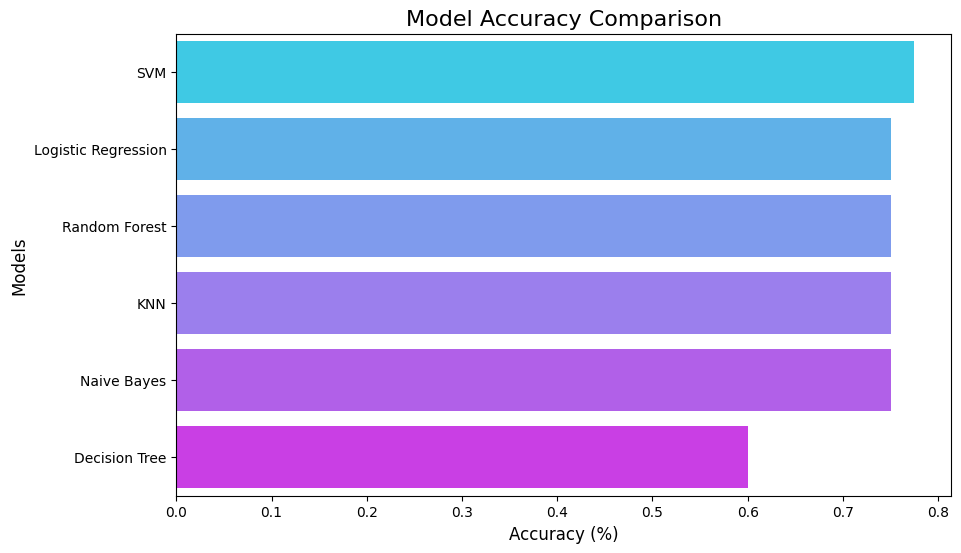

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=model_results, palette='cool')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.show()

# SVM IS OUR FINAL MODEL

# Recommendation Engine

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
service_usage = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']]
similarity_matrix = cosine_similarity(service_usage)
print("Similarity Matrix Example:\n", similarity_matrix[:5, :5])

Similarity Matrix Example:
 [[1.         0.90415171 0.90564866 0.92830514 0.97183595]
 [0.90415171 1.         0.95817466 0.99620939 0.82014065]
 [0.90564866 0.95817466 1.         0.97628201 0.88739808]
 [0.92830514 0.99620939 0.97628201 1.         0.86301209]
 [0.97183595 0.82014065 0.88739808 0.86301209 1.        ]]


In [59]:
import joblib
joblib.dump(svm, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']